In [2]:
import pandas as pd
import re
from textblob import TextBlob


In [4]:
# Sample textual data
data = {
    "review": [
        "I love this product, it is amazing!",
        "Worst experience ever, very disappointed",
        "The service was okay, nothing special",
        "Absolutely fantastic! Highly recommended",
        "Not good, will not buy again",
        "Great quality and fast delivery",
        "Terrible support, very bad experience"
    ]
}

df = pd.DataFrame(data)
df


,review
0,"I love this product, it is amazing!"
1,"Worst experience ever, very disappointed"
2,"The service was okay, nothing special"
3,Absolutely fantastic! Highly recommended
4,"Not good, will not buy again"
5,Great quality and fast delivery
6,"Terrible support, very bad experience"


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df


,review,cleaned_review
0,"I love this product, it is amazing!",i love this product it is amazing
1,"Worst experience ever, very disappointed",worst experience ever very disappointed
2,"The service was okay, nothing special",the service was okay nothing special
3,Absolutely fantastic! Highly recommended,absolutely fantastic highly recommended
4,"Not good, will not buy again",not good will not buy again
5,Great quality and fast delivery,great quality and fast delivery
6,"Terrible support, very bad experience",terrible support very bad experience


In [6]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)
df


,review,cleaned_review,sentiment
0,"I love this product, it is amazing!",i love this product it is amazing,Positive
1,"Worst experience ever, very disappointed",worst experience ever very disappointed,Negative
2,"The service was okay, nothing special",the service was okay nothing special,Positive
3,Absolutely fantastic! Highly recommended,absolutely fantastic highly recommended,Positive
4,"Not good, will not buy again",not good will not buy again,Negative
5,Great quality and fast delivery,great quality and fast delivery,Positive
6,"Terrible support, very bad experience",terrible support very bad experience,Negative


In [7]:
df['sentiment'].value_counts()


sentiment
Positive    4
Negative    3
Name: count, dtype: int64

# INSIGHTS FROM SENTIMENT ANALYSIS:

1. Positive reviews indicate customer satisfaction and good product quality.
2. Negative reviews highlight issues related to service and support.
3. Neutral sentiment represents average user experiences.
4. Text preprocessing improved clarity of sentiment detection.
5. NLP techniques help businesses understand customer opinions effectively.


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

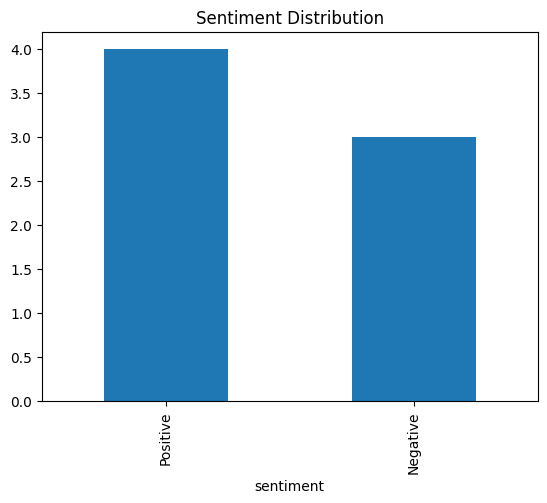

In [8]:
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
